In [1]:
#imports
import tensorflow as tf
import numpy as np
import Moment_Data as data
import matplotlib.pyplot as plt

In [2]:
#set parameters for setting data
num_moments = 50
num_coef = 3 #number of coefficient labels in the polynomial sequence

In [3]:
#load input data for gaussian
training = data.generate_training_data(1000, num_moments, num_coef) #outputs an array of x_vals, mean values, and sigma values respectively
training_moments = training[0] 
training_labels = training[1]  

testing = data.generate_training_data(300, num_moments, num_coef)
testing_moments = testing[0] 
testing_labels = testing[1] 



In [4]:
#set layers
model = tf.keras.models.Sequential() #feed forward
model.add(tf.keras.layers.Input(num_moments)) 
#hidden layers:  
model.add(tf.keras.layers.Dense(num_moments*2, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(num_moments*2, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(num_moments*2, activation = tf.nn.relu))
#output layer:
model.add(tf.keras.layers.Dense(num_coef,))


In [5]:
#optimize (train)
model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error',
              metrics = [tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(training_moments, training_labels, epochs = 16)


Train on 1000 samples
Epoch 1/16
1000/1000 [==============================] - 1s 1ms/sample - loss: 61.8068 - root_mean_squared_error: 7.8617
Epoch 2/16
1000/1000 [==============================] - 0s 103us/sample - loss: 9.3803 - root_mean_squared_error: 3.0627
Epoch 3/16
1000/1000 [==============================] - 0s 103us/sample - loss: 1.0381 - root_mean_squared_error: 1.0189
Epoch 4/16
1000/1000 [==============================] - 0s 110us/sample - loss: 0.2763 - root_mean_squared_error: 0.5257
Epoch 5/16
1000/1000 [==============================] - 0s 105us/sample - loss: 0.1235 - root_mean_squared_error: 0.3514
Epoch 6/16
1000/1000 [==============================] - 0s 102us/sample - loss: 0.0815 - root_mean_squared_error: 0.2854
Epoch 7/16
1000/1000 [==============================] - 0s 102us/sample - loss: 0.0534 - root_mean_squared_error: 0.2311
Epoch 8/16
1000/1000 [==============================] - 0s 98us/sample - loss: 0.0415 - root_mean_squared_error: 0.2036
Epoch 9/16
1

In [6]:
#test
results = model.evaluate(x = testing_moments, y = testing_labels)
val_loss = results[0] #loss between model and actual
val_acc = results[1] #accuracy of the model based on actual
print(val_loss, val_acc)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.022107688672840596 0.14868656


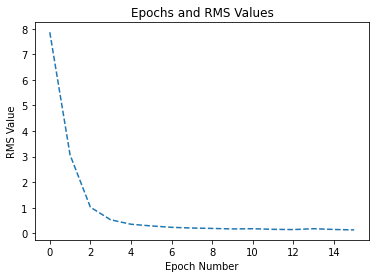

<Figure size 432x288 with 0 Axes>

In [7]:
#plot epoch number vs. training history to see optimal training epoch number 
plt.plot(range(16), history.history['root_mean_squared_error'], linestyle = '--') 
plt.xlabel('Epoch Number')
plt.ylabel('RMS Value')
plt.title('Epochs and RMS Values')
plt.show() 
plt.savefig('Epochs_RMS_Values_Polynomial.png')

In [8]:
#saves the model data
model.save('polynomial.model')
new_model = tf.keras.models.load_model('polynomial.model')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: polynomial.model/assets


In [9]:
#makes predictions for all elements in x_test array  
predictions = new_model.predict(testing_moments) #predicts all means and standard deviations of the x_test dataset

X Input Values: [-9.14468229 -5.25177253 -3.99276052 -3.15106352 -2.63853625 -2.25075966
 -1.98104967 -1.75059084 -1.5885201  -1.4323016  -1.32671924 -1.21194751
 -1.13937545 -1.05035451 -0.99857087 -0.92678339 -0.88883261 -0.82922724
 -0.80087793 -0.75025322 -0.72879432 -0.68501381 -0.66863481 -0.6302127
 -0.61766278 -0.58353028 -0.57392048 -0.54328681 -0.53597008 -0.50823605
 -0.50273163 -0.47743387 -0.4733782  -0.45015193 -0.44726578 -0.42581939
 -0.42388534 -0.4039825  -0.40282921 -0.38427604 -0.38376702 -0.36640273
 -0.36642823 -0.35011817 -0.35058912 -0.33521952 -0.33606311 -0.32153709
 -0.32269336 -0.3089278 ]
Actual Coefficient Labels: [-2.80134161 -7.8776588  -5.3129986 ]
Predicted Coefficient Labels: [-2.770833  -7.9682703 -5.2975817]


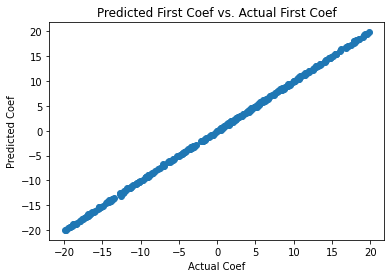

In [10]:
predictions = predictions.T
testing_labels = testing_labels.T
#plot predicted vs. actual testing values: label 1
plt.scatter(predictions[0],testing_labels[0]) #first coef
plt.title('Predicted First Coef vs. Actual First Coef')
plt.xlabel('Actual Coef')
plt.ylabel('Predicted Coef')
plt.show() 

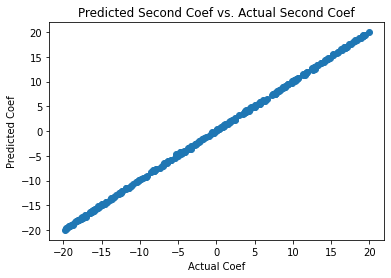

In [11]:
#plot actual vs. predicted value: label 2
plt.scatter(predictions[1],testing_labels[1]) 
plt.title('Predicted Second Coef vs. Actual Second Coef')
plt.xlabel('Actual Coef')
plt.ylabel('Predicted Coef')
plt.show()

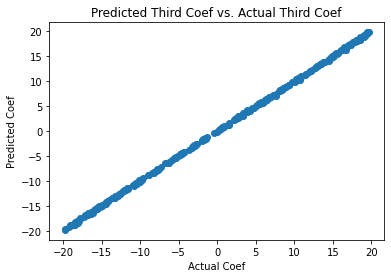

In [13]:
#plot actual vs. predicted value: label 3
plt.scatter(predictions[2],testing_labels[2]) 
plt.title('Predicted Third Coef vs. Actual Third Coef')
plt.xlabel('Actual Coef')
plt.ylabel('Predicted Coef')
plt.show()

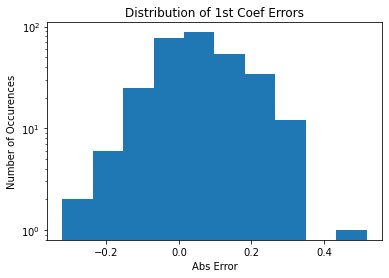

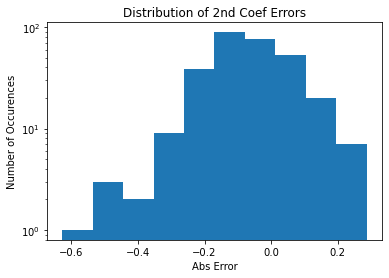

In [14]:
#histogram representing absolute error of actual vs. predicted values for first two labels 
plt.hist((predictions[0]-testing_labels[0]))
plt.yscale('log')
plt.title('Distribution of 1st Coef Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Abs Error')
plt.show()
plt.hist((predictions[1]-testing_labels[1]))
plt.yscale('log')
plt.title('Distribution of 2nd Coef Errors')
plt.ylabel('Number of Occurences') 
plt.xlabel('Abs Error') 
plt.show() 



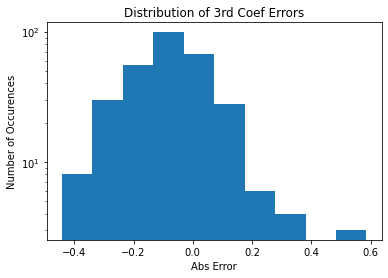

In [15]:
#histogram representing actual vs. predicted error for third label
plt.hist((predictions[2]-testing_labels[2]))
plt.yscale('log')
plt.title('Distribution of 3rd Coef Errors')
plt.ylabel('Number of Occurences') 
plt.xlabel('Abs Error') 
plt.show() 


In [ ]:
#histogram representing actual vs. predicted absolute error for 4th label
plt.hist((predictions[3]-testing_labels[3]))
plt.yscale('log')
plt.title('Distribution of 4th Coef Errors')
plt.ylabel('Number of Occurences') 
plt.xlabel('Abs Error') 
plt.show() 